# Clasificación de Especies de Flores del Dataset Iris: Análisis Exploratorio y Modelos de Aprendizaje Automático

## 0. Introducción


En el presente trabajo, se aborda la clasificación de especies de flores del famoso dataset de Iris, que se ha convertido en un estándar en el campo del aprendizaje automático. El análisis comienza con una exploración de datos (EDA) exhaustiva, donde se analizan las características y la distribución de los datos, así como la relación entre las variables mediante visualizaciones gráficas. Esta etapa es fundamental para entender la estructura del conjunto de datos y las potenciales correlaciones que podrían influir en el modelo.

Posteriormente, se implementan dos modelos de aprendizaje automático: el Árbol de Decisión y el K-Nearest Neighbors (KNN). Ambos modelos son conocidos por su eficacia en problemas de clasificación y se entrenan utilizando un subconjunto de los datos. La validación de los modelos se realiza mediante métricas de precisión y reportes de clasificación que permiten evaluar su rendimiento.

Finalmente, se realizan predicciones sobre nuevos datos utilizando los modelos entrenados, lo que demuestra su capacidad para generalizar y clasificar correctamente diferentes especies de flores basándose en sus características morfológicas. A través de este trabajo, se busca no solo aplicar técnicas de machine learning, sino también destacar la importancia de un análisis de datos inicial como base para la modelización efectiva.

### Qué es un EDA

- Comprender mejor un conjunto de datos:
- Identificar patrones, detectar anomalías, verificar suposiciones y resumir sus principales características

<img src="http://sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png" />

### DATASET IRIS 

Contiene 150 muestras de tres especies de flores (Iris setosa, Iris virginica e Iris versicolor), con cuatro características:

  1. longitud de sépalos
  2. anchura de sépalos 
  3. Longitud de pétalos
  4. Anchura de pétalos 

<img src="https://media.licdn.com/dms/image/D4D12AQF5vivFTAdZjQ/article-cover_image-shrink_600_2000/0/1700911428185?e=2147483647&v=beta&t=RaJufpE5-ZMvIMZFVTy4dNtvnKHVgmThtTORx-_qu6Q"/>

### Objetivo

El objetivo principal es construir un modelo que, usando estas características, clasifique correctamente las especies de flores con la mayor precisión posible.

## 1. Inicialización y Preparación de Datos

### 1.1 Imports

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### 1.2 Ajustes iniciales

In [60]:
# Comenta esta linea si tus visualizaciones no se ven
%matplotlib inline

# Configurar estilo de plt
plt.style.use("bmh")
# Configurar estilo de Seaborn
sns.set(style="whitegrid")

## 2. Carga y Preprocesamiento del Dataset

### 2.1 Lectura de datos

In [61]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 2.2 Preprocesamiento

In [62]:
#Renombramos las variables para falicitar su uso
df.rename({'SepalLengthCm':'sep_l',
           'SepalWidthCm':'sep_a',
           'PetalLengthCm':'pet_l',
           'PetalWidthCm':'pet_a',
           'Species':'especie'},
          axis=1, inplace=True)

## 3. Limpieza de Datos

In [63]:
df.drop('Id', axis=1, inplace=True)
df.head()

,sep_l,sep_a,pet_l,pet_a,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 4. Análisis Descriptivo

In [64]:
df.head()

,sep_l,sep_a,pet_l,pet_a,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Dimensiones del Dataset

In [65]:
df.shape

(150, 5)

#### Información General del Dataset

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sep_l    150 non-null    float64
 1   sep_a    150 non-null    float64
 2   pet_l    150 non-null    float64
 3   pet_a    150 non-null    float64
 4   especie  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [67]:
df.describe()

,sep_l,sep_a,pet_l,pet_a
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Recuento de la variable a predecir

In [68]:
df['especie'].value_counts()

especie
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_15072\2140497142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (data= df, x='especie', palette='pastel')


<Axes: xlabel='especie', ylabel='count'>

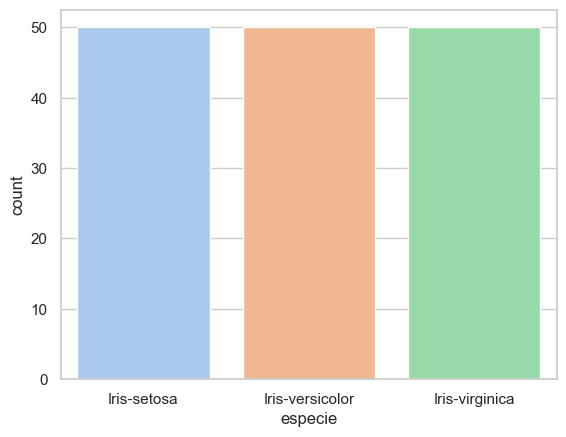

In [69]:
couns = df['especie'].value_counts()
sns.countplot (data= df, x='especie', palette='pastel')

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_15072\4200682324.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='especie', palette='pastel')


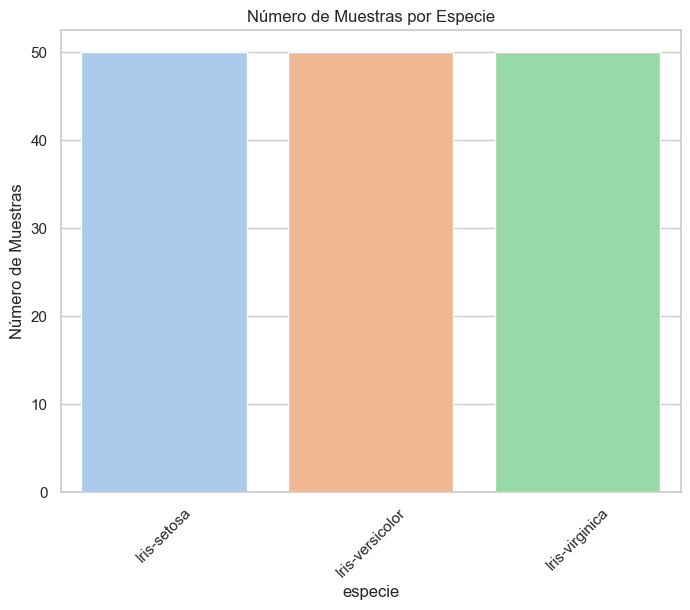

In [70]:
# Crear el gráfico de barras
counts =  df['especie'].value_counts()
# Crear el gráfico de barras usando Seaborn con colores diferentes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='especie', palette='pastel')
plt.ylabel('Número de Muestras')
plt.title('Número de Muestras por Especie')
plt.xticks(rotation=45)
plt.show()

### Comprobamos las variables nulas

In [71]:
df.isnull().sum(axis=0)

sep_l      0
sep_a      0
pet_l      0
pet_a      0
especie    0
dtype: int64

## 5. Analisis Univariante

### 5.1 Longitud del Sépalo

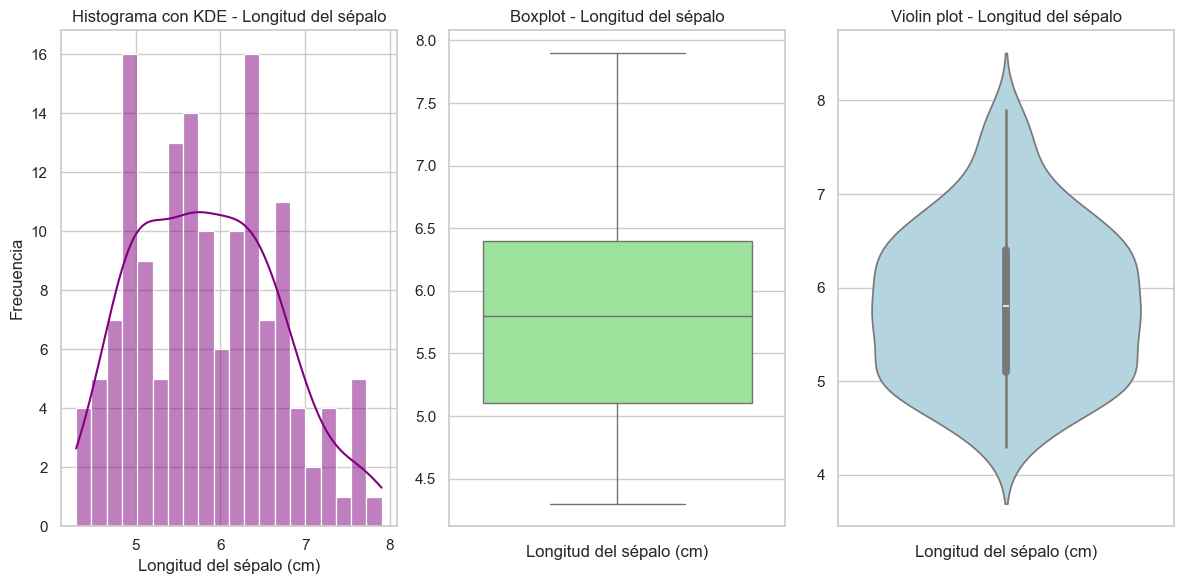

In [72]:
# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['sep_l'], kde=True, bins=20, color='purple')
plt.title('Histograma con KDE - Longitud del sépalo')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['sep_l'], color='lightgreen')
plt.title('Boxplot - Longitud del sépalo')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['sep_l'], color='lightblue')
plt.title('Violin plot - Longitud del sépalo')
plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

### 5.2 Ancho del Sépalo

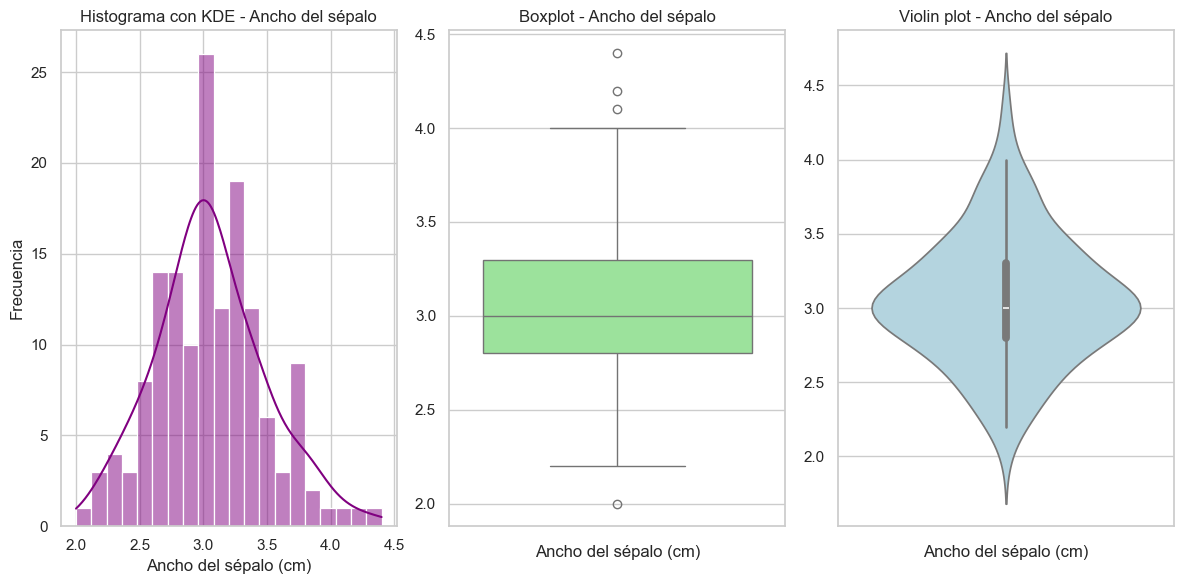

In [73]:
# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['sep_a'], kde=True, bins=20, color='purple')
plt.title('Histograma con KDE - Ancho del sépalo')
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['sep_a'], color='lightgreen')
plt.title('Boxplot - Ancho del sépalo')
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['sep_a'], color='lightblue')
plt.title('Violin plot - Ancho del sépalo')
plt.xlabel('Ancho del sépalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

### 5.3 Longitud del pétalo

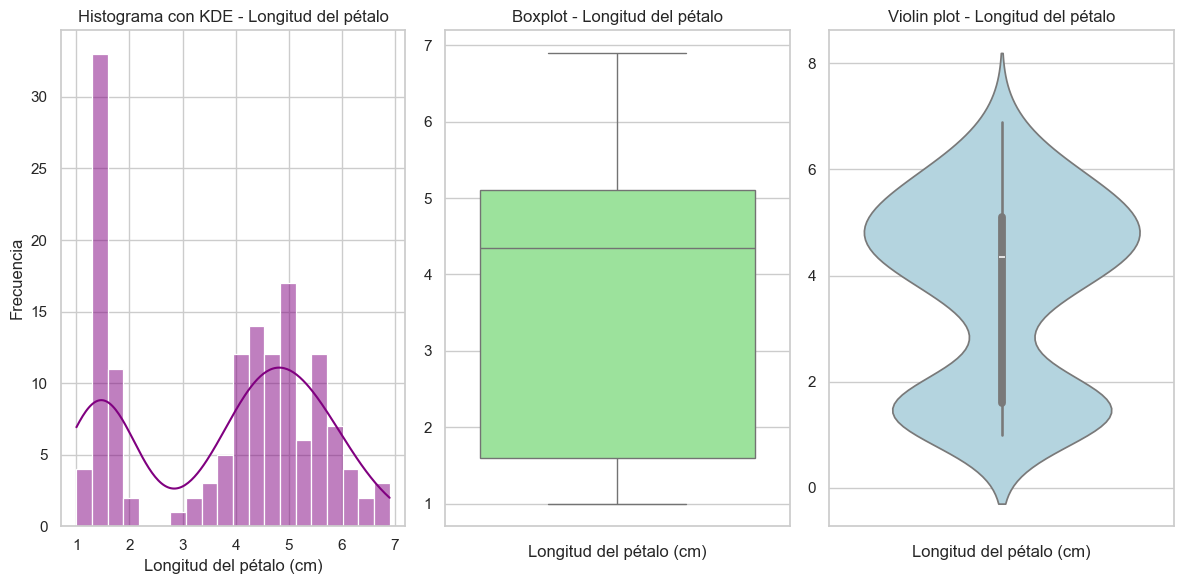

In [74]:
# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['pet_l'], kde=True, bins=20, color='purple')
plt.title('Histograma con KDE - Longitud del pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['pet_l'], color='lightgreen')
plt.title('Boxplot - Longitud del pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['pet_l'], color='lightblue')
plt.title('Violin plot - Longitud del pétalo')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

### 5.4 Ancho del pétalo

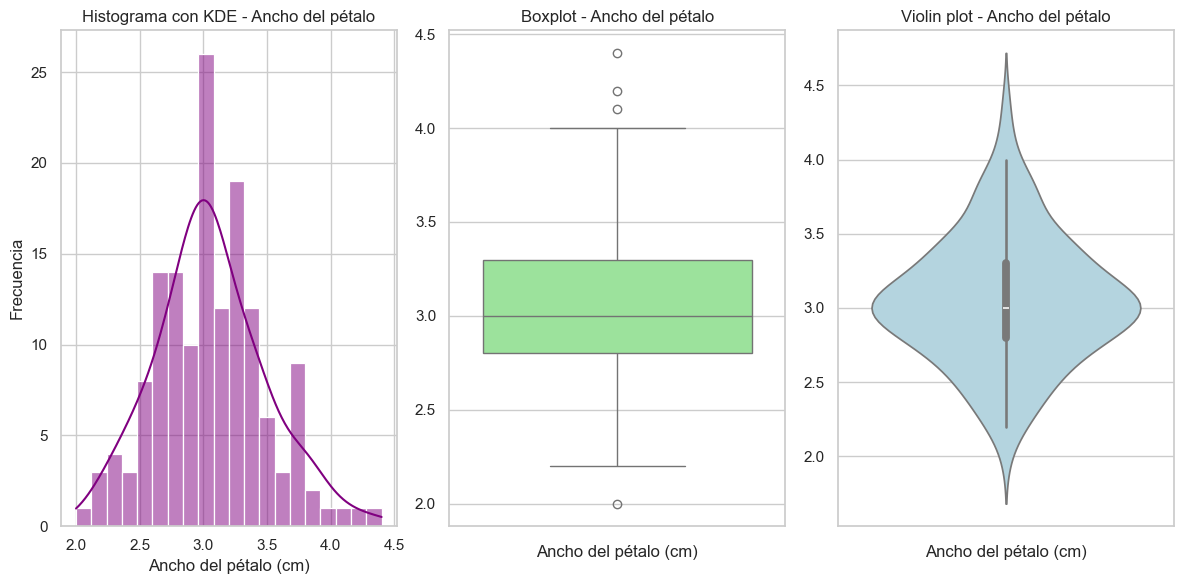

In [75]:
# 1. Histograma con KDE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['sep_a'], kde=True, bins=20, color='purple')
plt.title('Histograma con KDE - Ancho del pétalo')
plt.xlabel('Ancho del pétalo (cm)')
plt.ylabel('Frecuencia')

# 2. Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['sep_a'], color='lightgreen')
plt.title('Boxplot - Ancho del pétalo')
plt.xlabel('Ancho del pétalo (cm)')
plt.ylabel('')

# 3. Violin plot
plt.subplot(1, 3, 3)
sns.violinplot(y=df['sep_a'], color='lightblue')
plt.title('Violin plot - Ancho del pétalo')
plt.xlabel('Ancho del pétalo (cm)')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

## 6. Analisis Multivariante

### 6.1 Longitud de Sépalo y Especie

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_15072\586954739.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='especie', y='sep_l', palette='Set1', ax=axs[0, 1])
C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_15072\586954739.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='especie', y='sep_l', palette='Set1', ax=axs[1, 0])


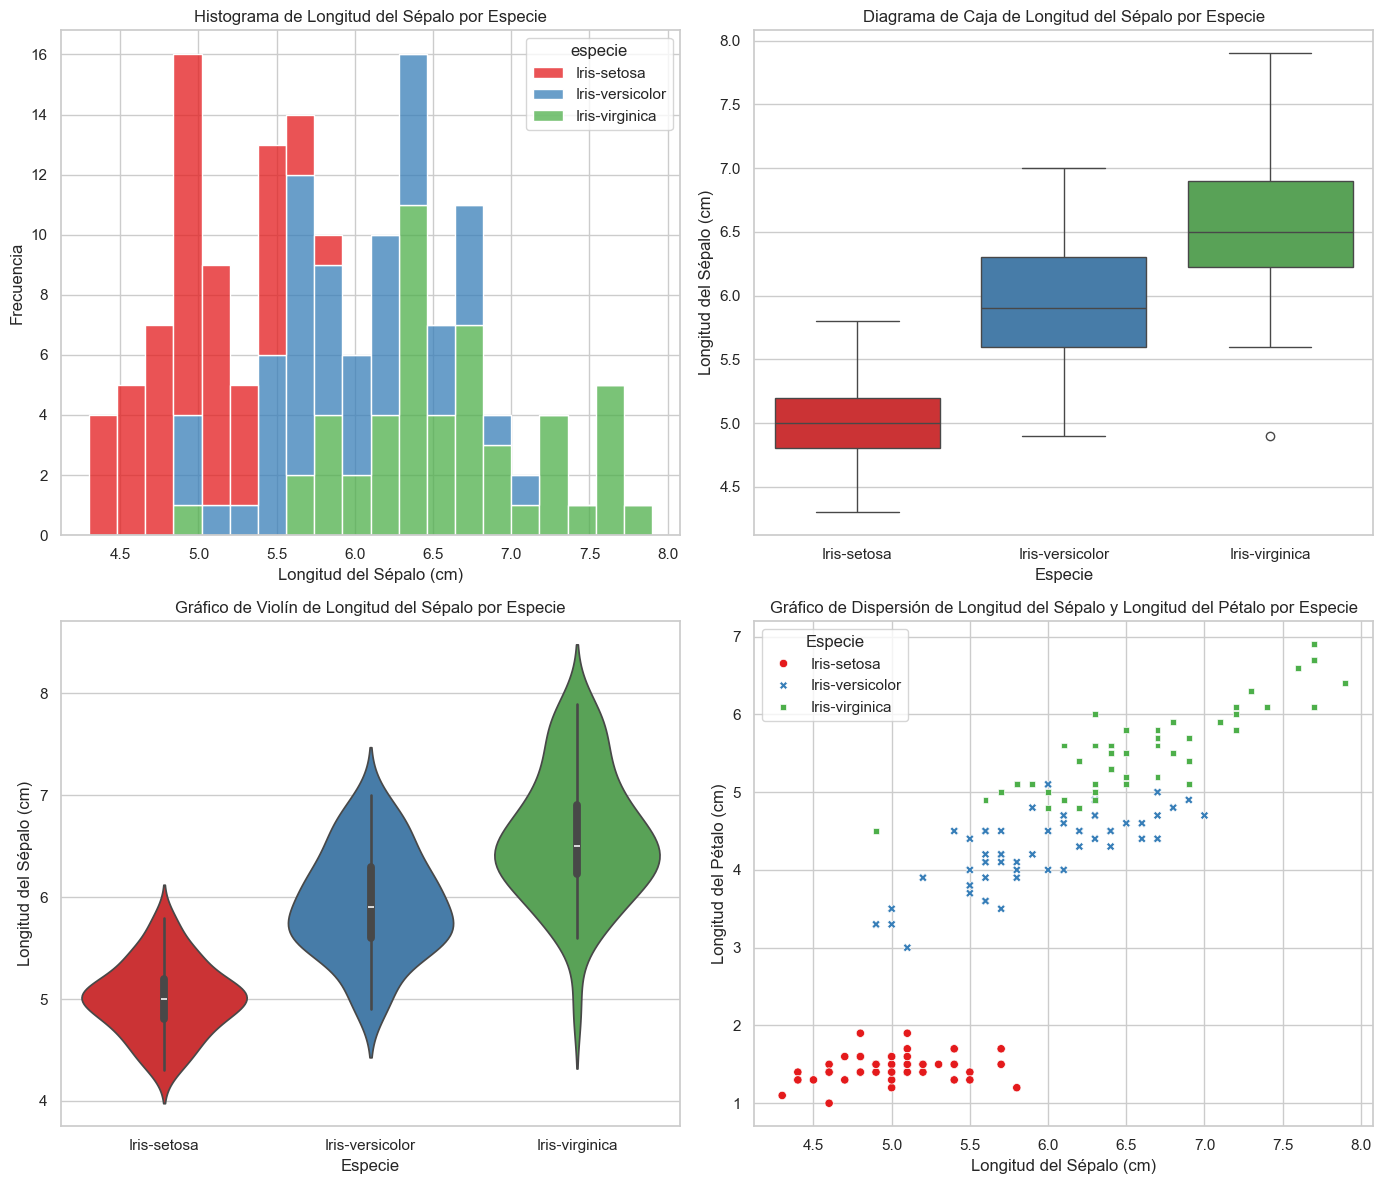

In [76]:
# Crear una figura con una cuadrícula de 2x2 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histograma de Longitud del Sépalo por Especie
sns.histplot(data=df, x='sep_l', hue='especie', multiple='stack', palette='Set1', bins=20, ax=axs[0, 0])
axs[0, 0].set_title('Histograma de Longitud del Sépalo por Especie')
axs[0, 0].set_xlabel('Longitud del Sépalo (cm)')
axs[0, 0].set_ylabel('Frecuencia')

# 2. Diagrama de Caja (Boxplot) de Longitud del Sépalo por Especie
sns.boxplot(data=df, x='especie', y='sep_l', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('Diagrama de Caja de Longitud del Sépalo por Especie')
axs[0, 1].set_xlabel('Especie')
axs[0, 1].set_ylabel('Longitud del Sépalo (cm)')

# 3. Gráfico de Violín de Longitud del Sépalo por Especie
sns.violinplot(data=df, x='especie', y='sep_l', palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title('Gráfico de Violín de Longitud del Sépalo por Especie')
axs[1, 0].set_xlabel('Especie')
axs[1, 0].set_ylabel('Longitud del Sépalo (cm)')

# 4. Gráfico de Dispersión (Scatter Plot) de Longitud del Sépalo por Especie
sns.scatterplot(data=df, x='sep_l', y='pet_l', hue='especie', palette='Set1', style='especie', ax=axs[1, 1])
axs[1, 1].set_title('Gráfico de Dispersión de Longitud del Sépalo y Longitud del Pétalo por Especie')
axs[1, 1].set_xlabel('Longitud del Sépalo (cm)')
axs[1, 1].set_ylabel('Longitud del Pétalo (cm)')
axs[1, 1].legend(title='Especie')

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()

### 6.2 Longitud de Sépalo y Especie

C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_15072\4091722703.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='especie', y='sep_a', palette='Set1', ax=axs[0, 1])
C:\Users\JORGE LUIS\AppData\Local\Temp\ipykernel_15072\4091722703.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='especie', y='sep_a', palette='Set1', ax=axs[1, 0])


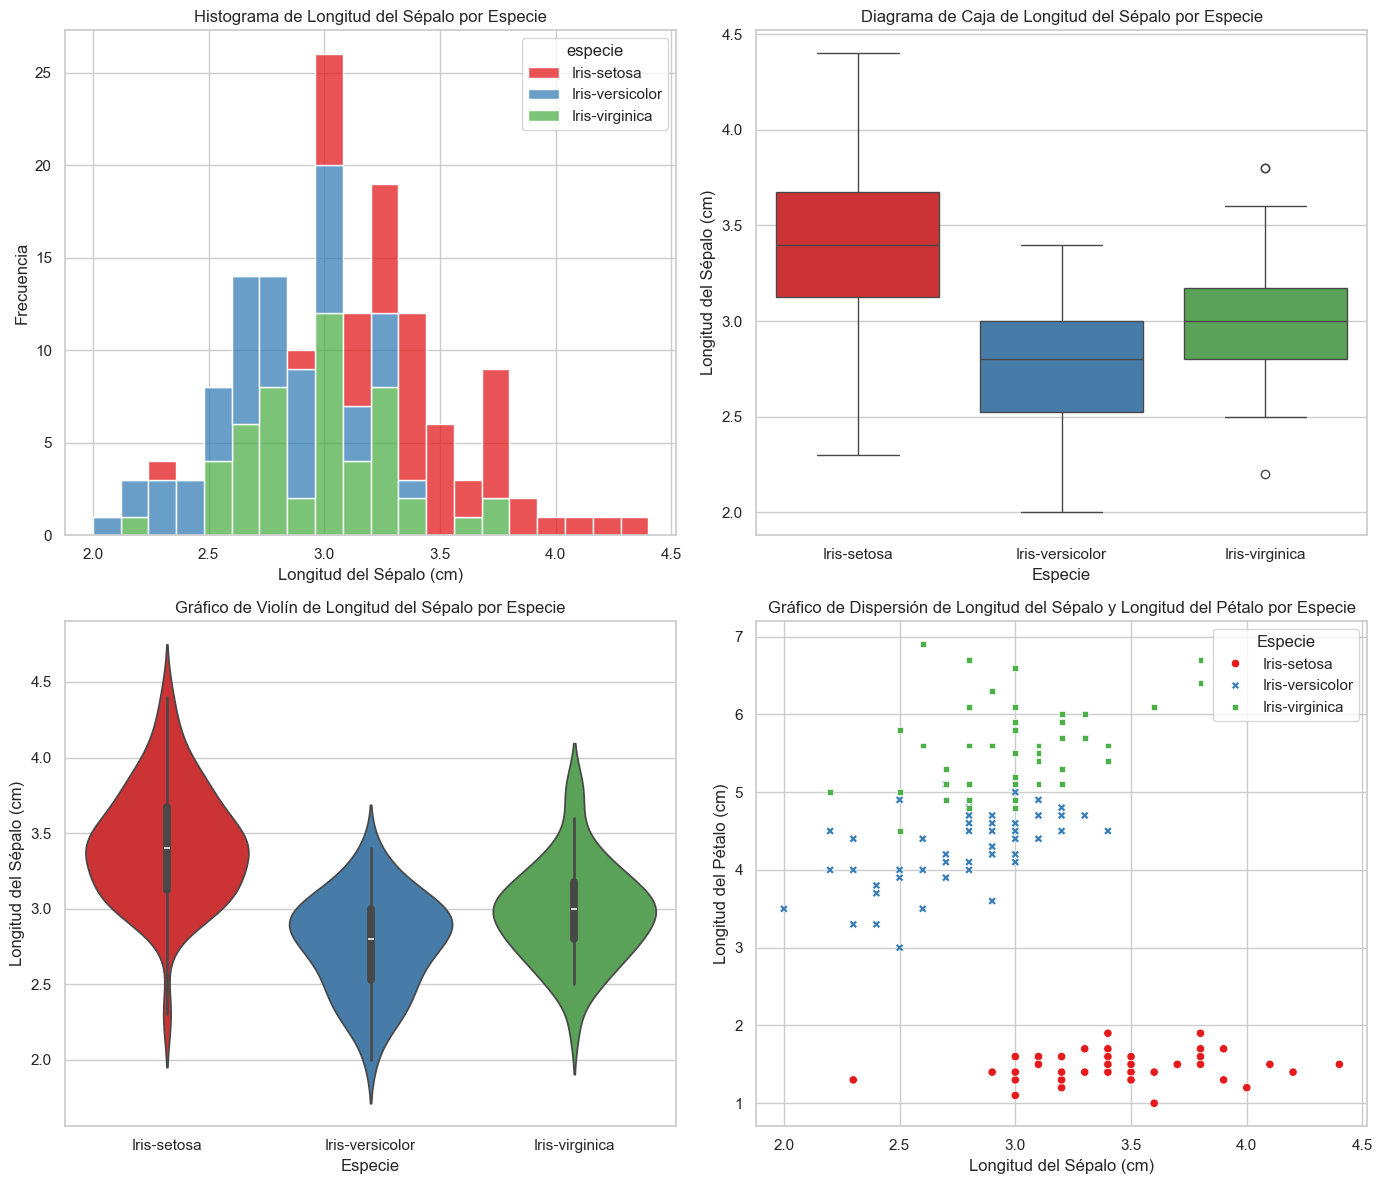

In [77]:
# Crear una figura con una cuadrícula de 2x2 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Histograma de Longitud del Sépalo por Especie
sns.histplot(data=df, x='sep_a', hue='especie', multiple='stack', palette='Set1', bins=20, ax=axs[0, 0])
axs[0, 0].set_title('Histograma de Longitud del Sépalo por Especie')
axs[0, 0].set_xlabel('Longitud del Sépalo (cm)')
axs[0, 0].set_ylabel('Frecuencia')

# 2. Diagrama de Caja (Boxplot) de Longitud del Sépalo por Especie
sns.boxplot(data=df, x='especie', y='sep_a', palette='Set1', ax=axs[0, 1])
axs[0, 1].set_title('Diagrama de Caja de Longitud del Sépalo por Especie')
axs[0, 1].set_xlabel('Especie')
axs[0, 1].set_ylabel('Longitud del Sépalo (cm)')

# 3. Gráfico de Violín de Longitud del Sépalo por Especie
sns.violinplot(data=df, x='especie', y='sep_a', palette='Set1', ax=axs[1, 0])
axs[1, 0].set_title('Gráfico de Violín de Longitud del Sépalo por Especie')
axs[1, 0].set_xlabel('Especie')
axs[1, 0].set_ylabel('Longitud del Sépalo (cm)')

# 4. Gráfico de Dispersión (Scatter Plot) de Longitud del Sépalo por Especie
sns.scatterplot(data=df, x='sep_a', y='pet_l', hue='especie', palette='Set1', style='especie', ax=axs[1, 1])
axs[1, 1].set_title('Gráfico de Dispersión de Longitud del Sépalo y Longitud del Pétalo por Especie')
axs[1, 1].set_xlabel('Longitud del Sépalo (cm)')
axs[1, 1].set_ylabel('Longitud del Pétalo (cm)')
axs[1, 1].legend(title='Especie')

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()

### 6.3 Relación entre todas las variables

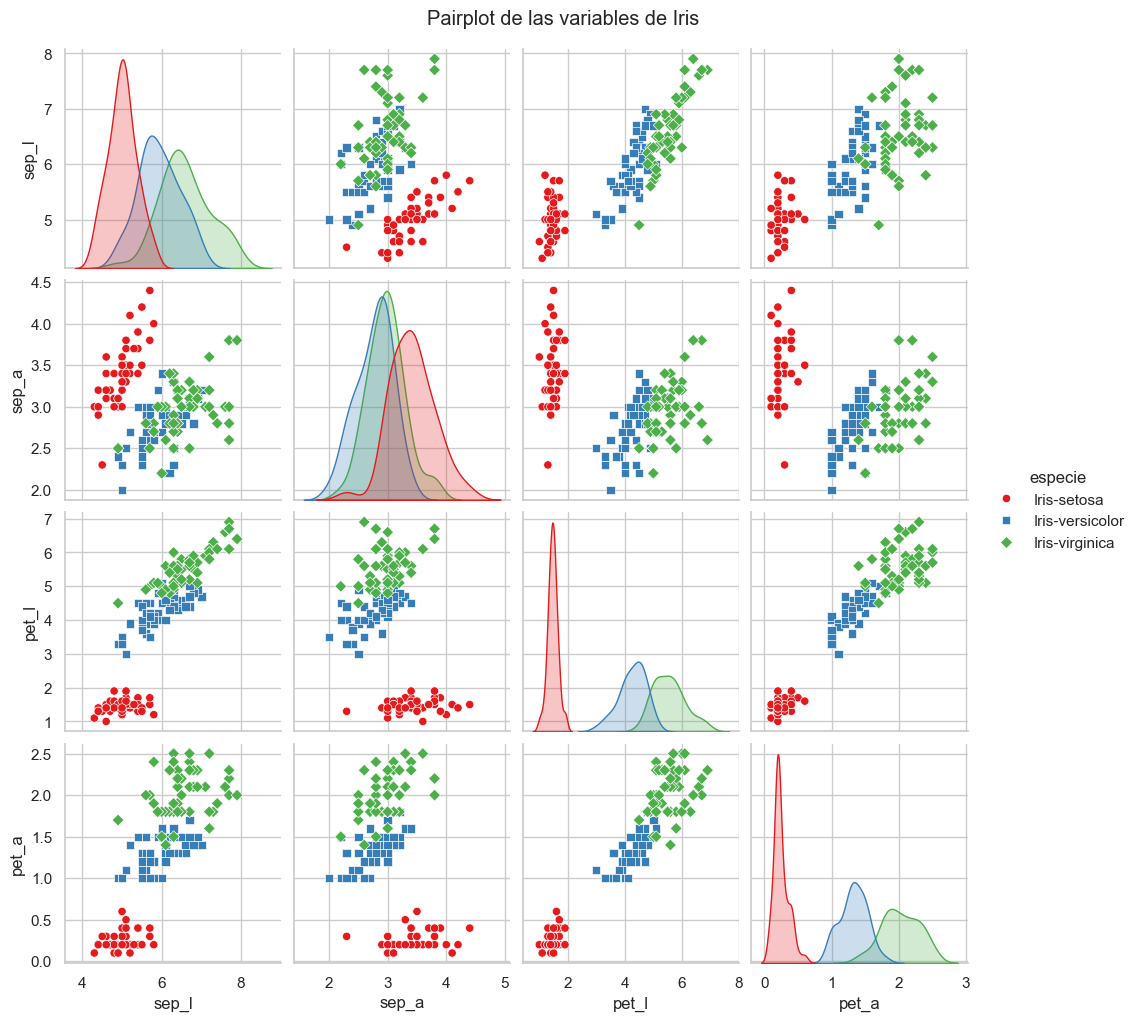

In [78]:
# Pairplot: muestra la relación entre todas las variables
sns.pairplot(df, hue='especie', markers=["o", "s", "D"], palette="Set1")
plt.suptitle('Pairplot de las variables de Iris', y=1.02)
plt.show()

### 6.4 Correlacion entre variables

In [79]:
df_numeric = df.select_dtypes(include='number')  # Seleccionar solo las columnas numéricas
df_corr = df_numeric.corr()  # Calcular la correlación
df_corr

,sep_l,sep_a,pet_l,pet_a
sep_l,1.000000,-0.109369,0.871754,0.817954
sep_a,-0.109369,1.000000,-0.420516,-0.356544
pet_l,0.871754,-0.420516,1.000000,0.962757
pet_a,0.817954,-0.356544,0.962757,1.000000


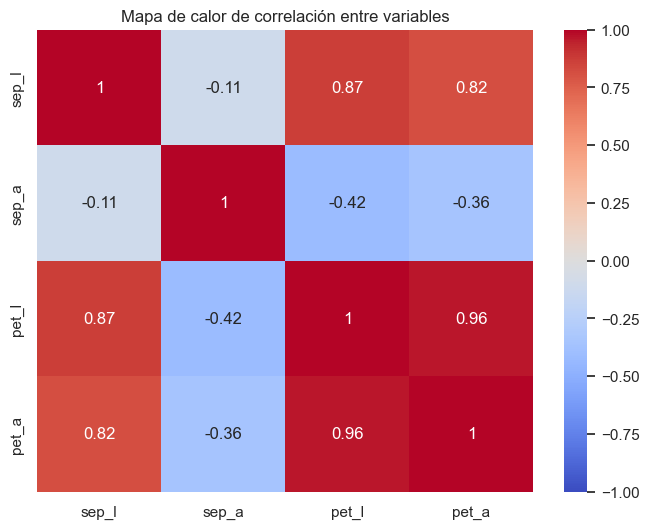

In [80]:
# Seleccionar solo columnas numéricas
correlation_matrix = df.select_dtypes(include='number').corr()

# Generar el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación entre variables')
plt.show()

### 6.5 Relación entre 3 variables

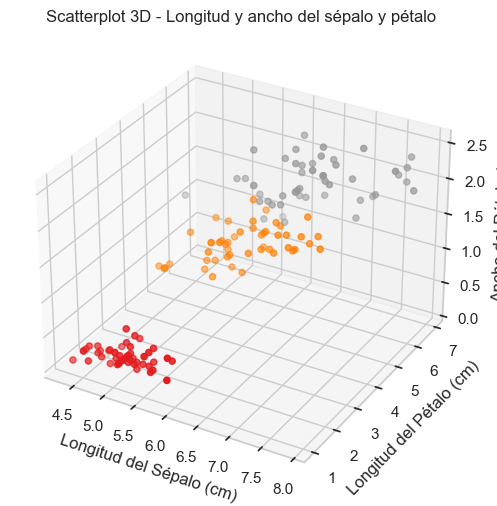

In [81]:
# 3. Scatterplot 3D: mostrar la relación entre 3 variables
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Crear scatterplot 3D usando 3 dimensiones: longitud del sépalo, longitud del pétalo y ancho del pétalo
scatter = ax.scatter(
    df['sep_l'], 
    df['pet_l'], 
    df['pet_a'], 
    c=pd.Categorical(df['especie']).codes, 
    cmap='Set1'
)

# Etiquetas
ax.set_xlabel('Longitud del Sépalo (cm)')
ax.set_ylabel('Longitud del Pétalo (cm)')
ax.set_zlabel('Ancho del Pétalo (cm)')
plt.title('Scatterplot 3D - Longitud y ancho del sépalo y pétalo')

# Mostrar gráfico
plt.show()

In [82]:
print(df.columns)

Index(['sep_l', 'sep_a', 'pet_l', 'pet_a', 'especie'], dtype='object')


## 7. Creación de un Modelo de Machine Learning con Árbol de Decisión para Predecir Especies de Flores en el Dataset de Iris

Precisión: 1.0
Reporte de clasificación:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



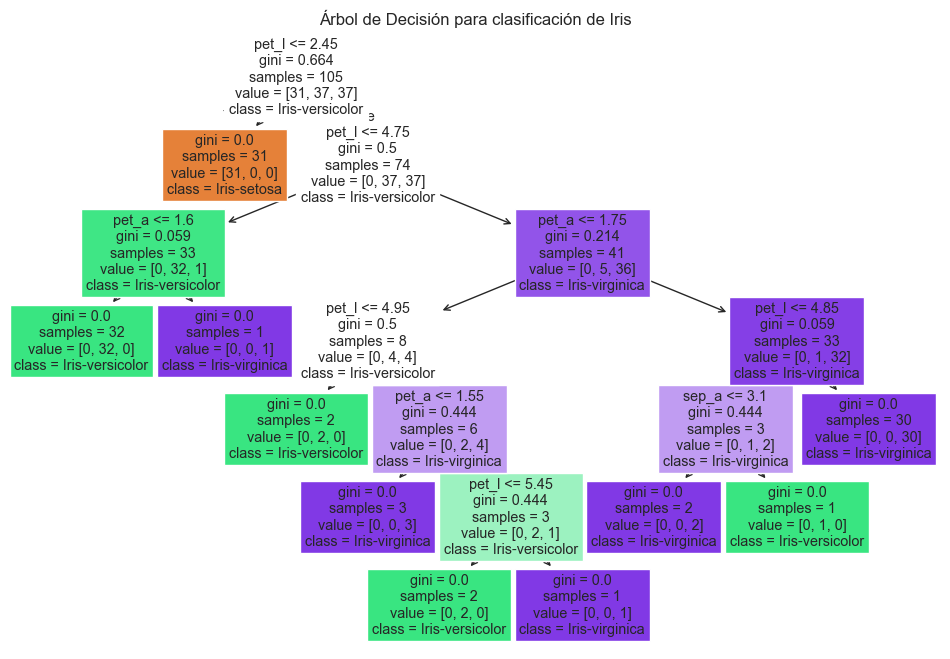

In [87]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Separar las características y la variable objetivo
X = df[['sep_l', 'sep_a', 'pet_l', 'pet_a']]  # Características
y = df['especie']  # Etiquetas (Especies)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['sep_l', 'sep_a', 'pet_l', 'pet_a'], class_names=model.classes_, filled=True)
plt.title("Árbol de Decisión para clasificación de Iris")
plt.show()

### 7.1 Predicciones

In [88]:
# Ejemplos de datos para predecir
# Cada fila representa una flor con sus respectivas características (sep_l, sep_a, pet_l, pet_a)
nuevos_datos = [
    [5.1, 3.5, 1.4, 0.2],  # Ejemplo de flor que podría ser "Setosa"
    [6.2, 3.4, 5.4, 2.3],  # Ejemplo de flor que podría ser "Virginica"
    [5.9, 3.0, 4.2, 1.5]   # Ejemplo de flor que podría ser "Versicolor"
]

# Realizar las predicciones
predicciones = model.predict(nuevos_datos)

# Mostrar resultados
for i, prediccion in enumerate(predicciones):
    print(f"Ejemplo {i+1}: Predicción de especie - {prediccion}")

Ejemplo 1: Predicción de especie - Iris-setosa
Ejemplo 2: Predicción de especie - Iris-virginica
Ejemplo 3: Predicción de especie - Iris-versicolor


c:\Users\JORGE LUIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 8. Creación de un Modelo de Machine Learning con K-Nearest Neighbors para Predecir Especies de Flores en el Dataset de Iris

In [85]:
# Importar las librerías necesarias
from sklearn.neighbors import KNeighborsClassifier

# Separar las características y la variable objetivo
X = df[['sep_l', 'sep_a', 'pet_l', 'pet_a']]  # Características
y = df['especie']  # Etiquetas (Especies)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de K-Nearest Neighbors
model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Precisión: 1.0
Reporte de clasificación:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### 8.1 Predicciones

In [86]:
# Realizar las predicciones
predicciones = model.predict(nuevos_datos)

# Mostrar las predicciones
for i, pred in enumerate(predicciones):
    print(f"Predicción para el conjunto de datos {i + 1} ({nuevos_datos[i]}): {pred}")

Predicción para el conjunto de datos 1 ([5.1, 3.5, 1.4, 0.2]): Iris-setosa
Predicción para el conjunto de datos 2 ([6.2, 3.4, 5.4, 2.3]): Iris-virginica
Predicción para el conjunto de datos 3 ([5.9, 3.0, 4.2, 1.5]): Iris-versicolor


c:\Users\JORGE LUIS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
